## Table of Content

### 1. Introduction
- 1.1 Data Description
- 1.2 Feature Description
- 1.3 Objective of this project

### 2. Fetching Data
- 2.1 Import necessary Libraries
- 2.2 Import data

### 3. EDA

### 4. Encoding Dataframe
### 5. Describe the dataset
### 6. Correlation of the features with target column
### 7. Visualizing correlation of feature columns with label column.
### 8. Checking Distribution of data
### 9. Checking Outliers
- 9.1 Removing Outliers
- 9.2 Percentage of data loss


### 10. Checking Multicollinearity
### 11. Building Model
- 11.1 Balancing Datasaet
- 11.2 LogisticRegression
- 11.3 Random Forest Classifier
- 11.4 Gradient Boosting Classifier
- 11.5 XGBOOST
- 11.6 SVC
- 11.7 KNN


### 12. Selecting Best Model
### 13. Hyperparameter Tuning
### 14. ROC_AUC Curve
### 15. Documenting the finding
### 16. Model Save

## 1. Introduction
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.


### 1.1 Data Description
- This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.
Loan_ID

- Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term, Credit History and Property_Area.

### 1.2 Features Discription

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status


### 1.3 Objective of this project
- The goal of this machine learning project is to predict the Loan_Status.
- This is the classification problem

## 2. Fetching Data

### 2.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

### 2.2 Importing Dataset

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.shape

(614, 13)

### Droping Duplicates

In [7]:
data.drop_duplicates()
data.shape

(614, 13)

- No duplicates values are present.

### Checking unique values

In [8]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# 3.  EDA

### Checking Null Values

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

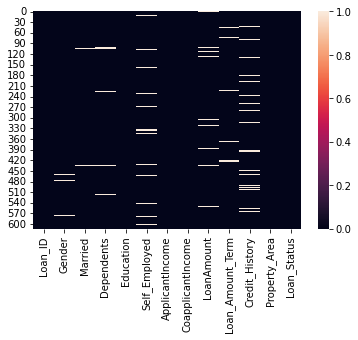

In [10]:
sns.heatmap(data.isnull())

- We can see, the null values present in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History

### Filling Missing values

In [11]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [12]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [13]:
null_columns =['Gender','Married','Dependents','Self_Employed']
for i in null_columns:
    data.fillna(data[i].mode()[0], inplace=True)

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Checking All Information

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- No null value present.
- Datatype is ok with respect to their column.

# Visualization of the data

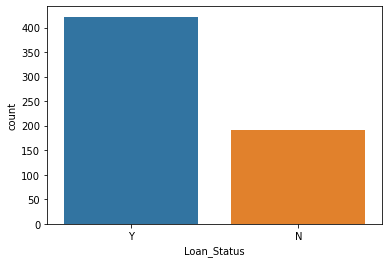

In [16]:
sns.countplot(x='Loan_Status',data=data)
plt.show()

- We can see, Yes are indicating that loan applications are accepted. While No indicated that, Loan application rejected or In process.
- We can se, Loan application approved is maximum then 'No'.

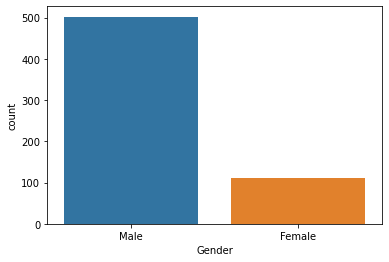

In [17]:
sns.countplot(x='Gender',data=data)
plt.show()

- We can see, Male are maximum whose applying for loan then Female.
- Upto 100 both male and female are equally applying for loan.

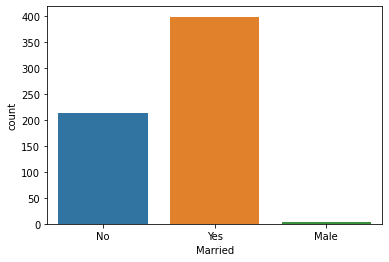

In [18]:
sns.countplot(x='Married',data=data)
plt.show()

- We can see, Married people are mostly applying for loan, there proportion are high then other.
- Those are Unmarried they also applying for loan.

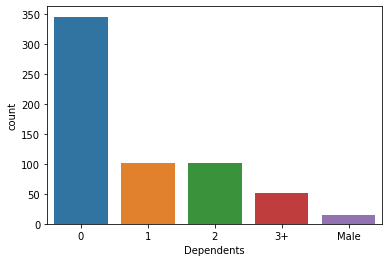

In [19]:
sns.countplot(x='Dependents',data=data)
plt.show()

- This is show that how many members are depending on applicant.
- Here 0 has maximum number. It means that applicant is married or may be not or single there is no one is depending on applicant.
- Dependents 1 and Dependents 2 are equal.

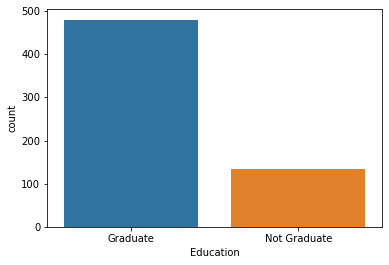

In [20]:
sns.countplot(x='Education',data=data)
plt.show()

- We can see, Graduate are more applying for loan then Non graduate.
- Upto 110 both are equal.

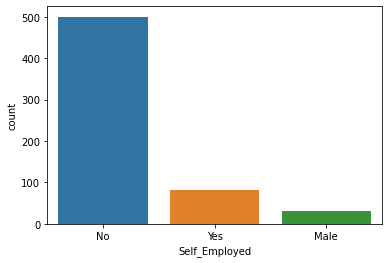

In [21]:
sns.countplot(x='Self_Employed',data=data)
plt.show()

- We can see, those people are not self employed they have maximum number whose applying for loan.
- Very less self employed people are got loan or applying for loan.
- Here male has seperate category in self employed. Male are lowest in number whose got loan or applying for loan.

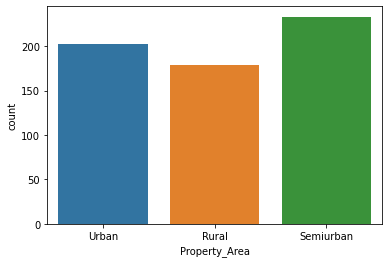

In [22]:
sns.countplot(x='Property_Area',data=data)
plt.show()

- We can see, those people are lived in Semiurban area they may highet in loan application followed by Urbon.
- Rural area has in lowest position whose applying for loan but all three are equally distributed upto 170.

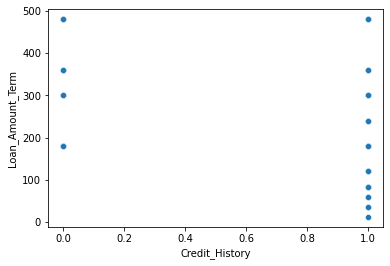

In [23]:
sns.scatterplot(x='Credit_History',y='Loan_Amount_Term',data=data)
plt.show()

- These two features are not in linear relationship.
- From 200 to 400 both are equally distributed.

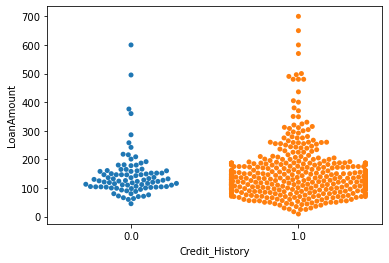

In [24]:
sns.swarmplot(x='Credit_History',y='LoanAmount',data=data)
plt.show()

- We can see, credit histor has only two categories. 0 may be Bad and 1 may be good.
- Those are having credit history 1(good), they have maximum chance to get loan.
- We can see, 0 to 200 in this range of Loan Amount  maximum are applying for loan.

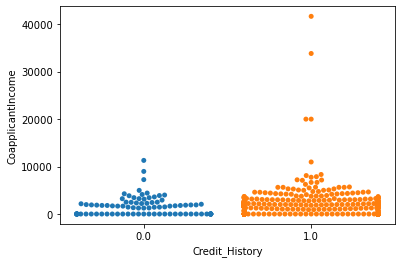

In [25]:
sns.swarmplot(x='Credit_History',y='CoapplicantIncome',data=data)
plt.show()

- Those people are having credit history 1(good) their coapplicant income also good.
- maximum coapplicant income are having in the range of 0 to 10000.

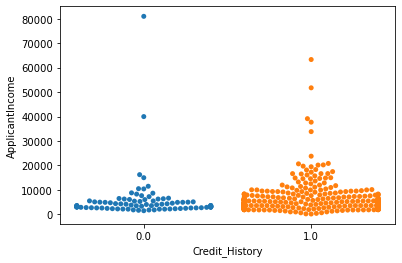

In [26]:
sns.swarmplot(x='Credit_History',y='ApplicantIncome',data=data)
plt.show()

- Those people are having credit history 1(good) they also have high income comparing to other.
- Here those are having good credit history they have maximum chance to get loan.

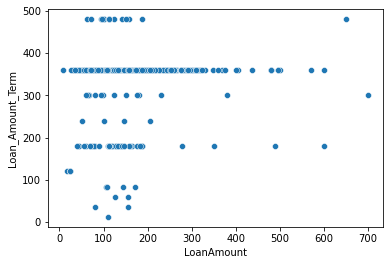

In [27]:
sns.scatterplot(x='LoanAmount',y='Loan_Amount_Term',data=data)
plt.show()

- Those are having loan amount term from 200 to 400 they are in maximum number.
- No linear relationship with each other.

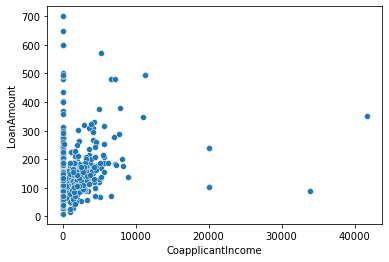

In [28]:
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',data=data)
plt.show()

- There is little linear relationship between both features.
- We can see, loant amount is less then coapplicant income. It means maximum loan amount are less than coapplicant income.

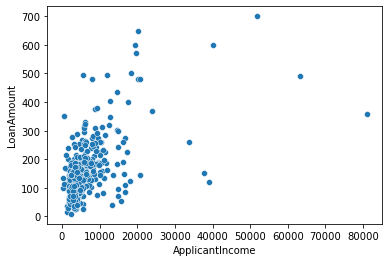

In [29]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=data)
plt.show()

- We can see, ApplicantIncome is having linear relationship with Loan Amount.
- Maximum loan amount is below 300.

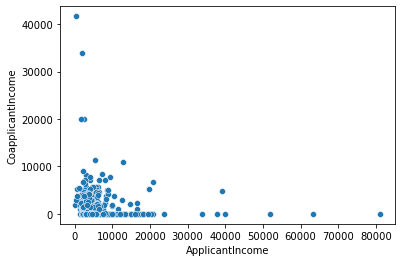

In [30]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',data=data)
plt.show()

- Maximum Income lies in the range of 0 to 10000. 

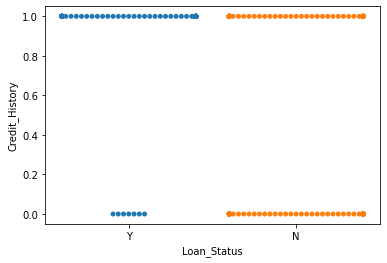

In [31]:
sns.swarmplot(x='Loan_Status',y='Credit_History',data=data)
plt.show()

- We can see, Whose having credit history 1(good), they also have high chance to get loan we can seen in loan status yes.
- Bad credit history and loan rejection are in almost in same proportion. 

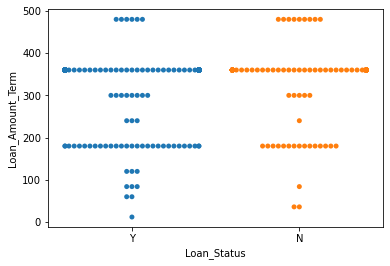

In [32]:
sns.swarmplot(x='Loan_Status',y='Loan_Amount_Term',data=data)
plt.show()

- Those are having loan status yes they also having high loan amount term.
- But both are almost in same proportion.

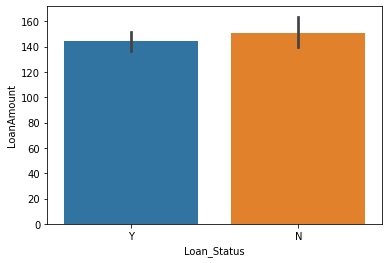

In [33]:
sns.barplot(x='Loan_Status',y='LoanAmount',data=data)
plt.show()

- We can see, Approved loan are low comaring to rejectet loan i.ei. No.
- Those loan are approving whose having a low loan amount. Mostly high loan amount loan are not approoved. 

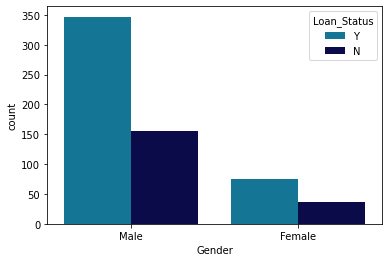

In [34]:
sns.countplot(x='Gender',hue='Loan_Status',data=data, palette='ocean_r')
plt.show()

- We can see, the proportion of approve loan are high in male then female. Where as rejection also high in male then female.
- While in female loan application acceptance and rejection ratio is low comapring male.

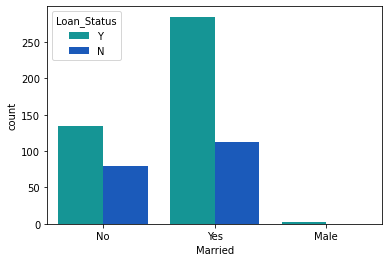

In [35]:
sns.countplot(x='Married',hue='Loan_Status',data=data,palette='winter_r')
plt.show()

- We can see, married people are having high chance to get loan followed by unmarried.
- Very few in male whose having chance to get loan.

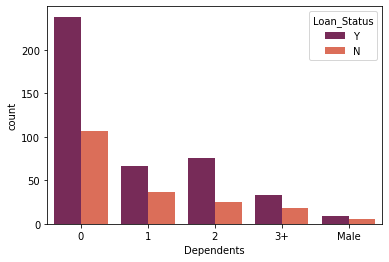

In [36]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data,palette='rocket')
plt.show()

- Those loan are approved they have 0 dependents people on applicant. But loan rejected or not approved also high in 0 dependents.
- In approved loan, 2 dependents on applicant are having 2nd position to get loan.
- Male is seperate category in dependent, here male dependents on applicant are having very less chance to get loan or approved loan.

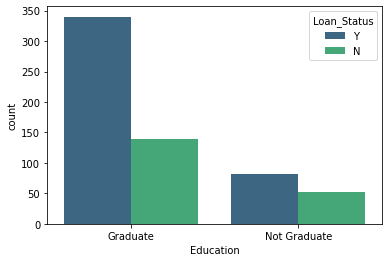

In [37]:
sns.countplot(x='Education',hue='Loan_Status',data=data,palette='viridis')
plt.show()

- We can see, Approved loan are high in graducate.
- Approved loan are low in non graduate.

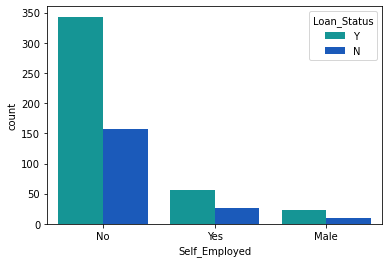

In [38]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data,palette='winter_r')
plt.show()

- Those are worked in private or goverment sector i.e. not self employed they have more chance to approved their loan.
- Self-empoyed comparing to not self empoyed , they are in low in number whose loan are approved or get.
- Neither not self employed nor self empoyed they are perticularly male have least chance to get loan.

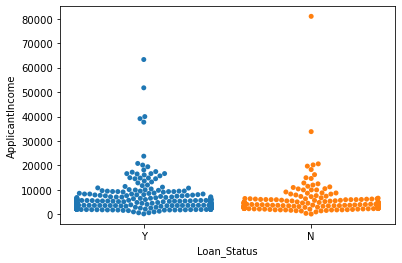

In [39]:
sns.swarmplot(y='ApplicantIncome',x='Loan_Status',data=data,)
plt.show()

- Those application are approved for loan they have more income then not approved application.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

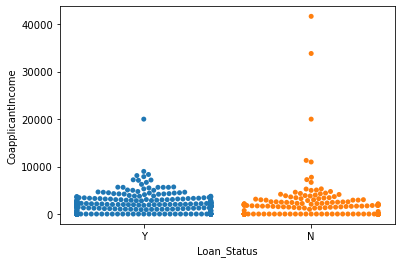

In [40]:
sns.swarmplot(x='Loan_Status',y='CoapplicantIncome',data=data)

- Whose loan status is 'No' they are having high coapplicantIncome.
- Similarly Whose loan status is 'Yes' has low coapplicant income.

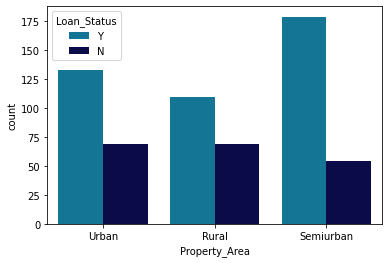

In [41]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data,palette='ocean_r')
plt.show()

- Those are proparties are belong to semiurban area they having high approval rate of loan application followed by Urban.
- In rural are property have more  not approval loan status.

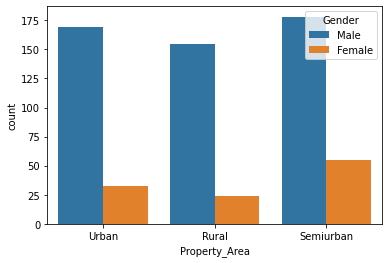

In [42]:
sns.countplot(x='Property_Area',hue='Gender',data=data)
plt.show()

- Male are got more loan approval then female.
- If the proparites are in Suburban area where male are got maximum loan then female.
- In Rural area male are more holding properties then female.

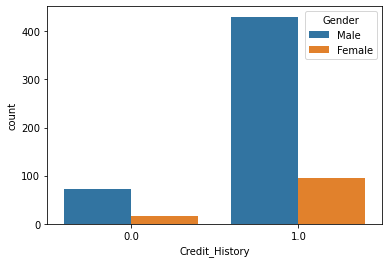

In [43]:
sns.countplot(x='Credit_History',hue='Gender',data=data,)
plt.show()

- Male have good credit History than female.It becouse maximum loan application holder are male than female.
- Similarly nale has high gad credit history than female.

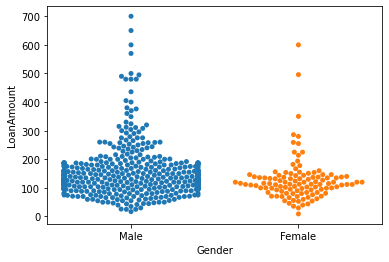

In [44]:
sns.swarmplot(x='Gender',y='LoanAmount',data=data,)
plt.show()

- We can see, male applicant has high loan amount than female.
- Upto 150 both are having equal loan amount.

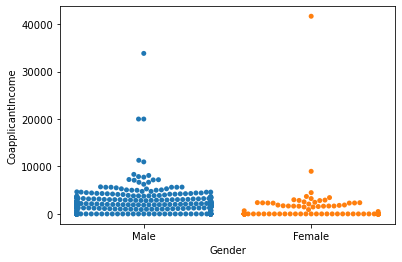

In [45]:
sns.swarmplot(x='Gender',y='CoapplicantIncome',data=data,)
plt.show()

- We can see, male has more coapplicant income than female.
- Upto 5000, both are having equal coapplicant income.

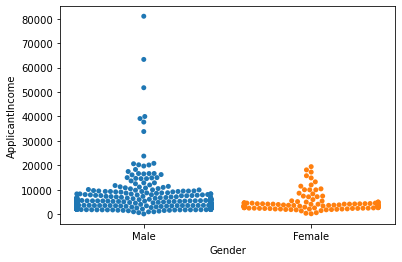

In [46]:
sns.swarmplot(x='Gender',y='ApplicantIncome',data=data,)
plt.show()

- We can see, male has more applicant income than female.
- Upto 10000, both are having equal applicant income.

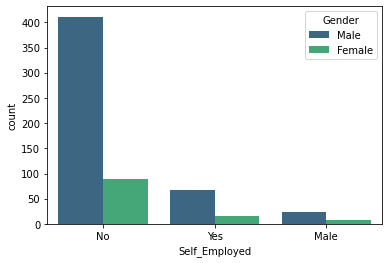

In [47]:
sns.countplot(x='Self_Employed',hue='Gender',data=data,palette='viridis')
plt.show()

- We can see, maximum male are not self employed. In not self employed, male are more than female. It mean that percentage of both male and female are having big difference.
- In self employed male are more than female.

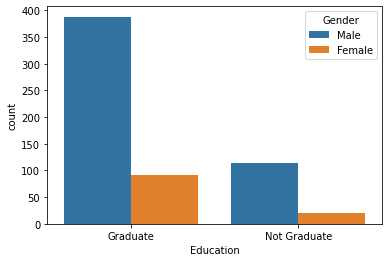

In [48]:
sns.countplot(x='Education',hue='Gender',data=data,)
plt.show()

- We can see, more male are graduage than female.
- Similarly more male are not graduate than female.

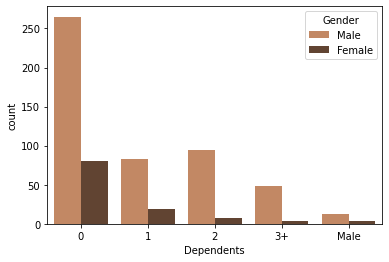

In [49]:
sns.countplot(x='Dependents',hue='Gender',data=data,palette='copper_r')
plt.show()

- We can see, male dependents are high than female in 0.
- While in all dependents female are very less dependents on applicant than male.

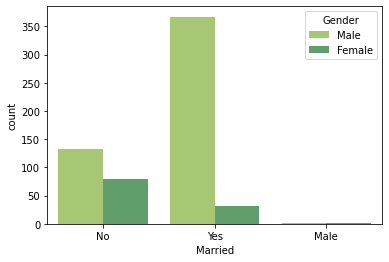

In [50]:
sns.countplot(x='Married',hue='Gender',data=data,palette='summer_r')
plt.show()

- We can see, more male married than female.
- Similarly in not married male are more than female.

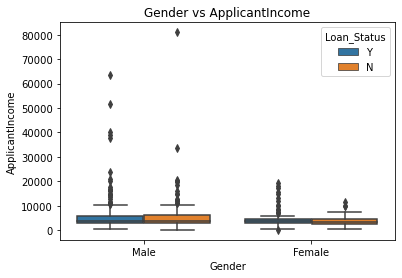

In [51]:
sns.boxplot(x='Gender',y='ApplicantIncome',data=data,hue='Loan_Status')
plt.title('Gender vs ApplicantIncome')
plt.show()

- We can see, Loan approval rate is higher in female than male.
- Female and male are almost having same applicantincome.

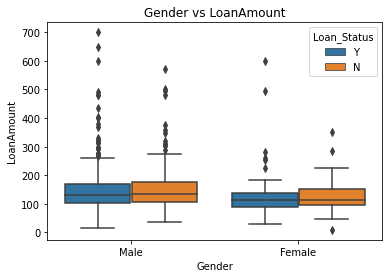

In [52]:
sns.boxplot(x='Gender',y='LoanAmount',data=data,hue='Loan_Status')
plt.title('Gender vs LoanAmount')
plt.show()

- The median loan amount for male is 140. and median loan amount for female 120.
- The LoanAmount for Loan aprroval and not approval is almost same in male and female.

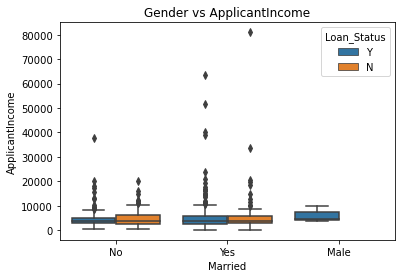

In [53]:
sns.boxplot(x='Married',y='ApplicantIncome',data=data,hue='Loan_Status')
plt.title('Gender vs ApplicantIncome')
plt.show()

- Married aaplicant has maximum income as mell high rate of loan approval.
- Not married has comparetively lo aaplicantIncome than married. And have low approval of loan.

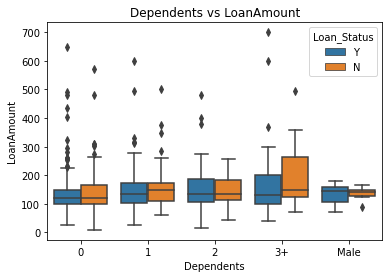

In [54]:
sns.boxplot(x='Dependents',y='LoanAmount',data=data,hue='Loan_Status')
plt.title('Dependents vs LoanAmount')
plt.show()

- Whose have 0 Dependents and their median of loan amount is same for both approval and not approval.
- 3+ dependents has high in not approved loan becouse their loan amount is high and their dependents on applicant has more than 3.
- In dependents 2, in which median of loan amount is same in loan approval and rejectet.

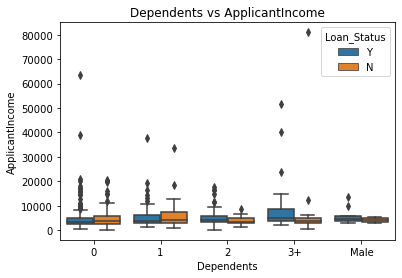

In [55]:
sns.boxplot(x='Dependents',y='ApplicantIncome',data=data,hue='Loan_Status')
plt.title('Dependents vs ApplicantIncome')
plt.show()

- Whose have 0 Dependents and thier median of applicant income is almost same for both approval and not approval.
- In dependents 3+, in which median of applicant income is high and their approval of loan also high.

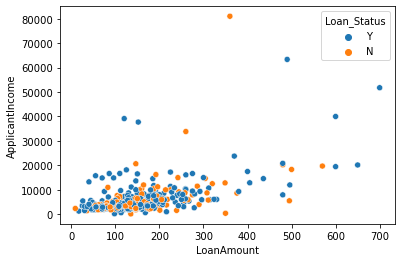

In [56]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=data,hue='Loan_Status')
plt.show()

- We can see, applicants income are increasing then loan amount also increasing and their chance of approval of loan also increasing.

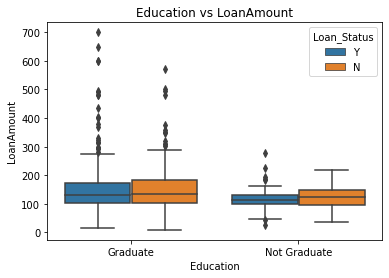

In [57]:
sns.boxplot(x='Education',y='LoanAmount',data=data,hue='Loan_Status')
plt.title('Education vs LoanAmount')
plt.show()

- Median of loan amount is almost same for both loan approval and not approval in graduate.
- In non-graduate, median of loan amount whose approved is lower than not approved.

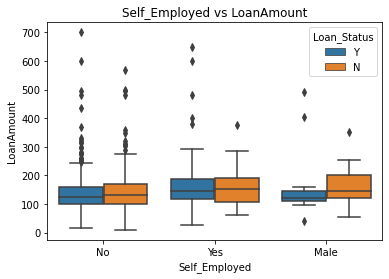

In [58]:
sns.boxplot(x='Self_Employed',y='LoanAmount',data=data,hue='Loan_Status')
plt.title('Self_Employed vs LoanAmount')
plt.show()

- In self-employed, median of loan amount whose approved is slightly lower than not approved loan i.e.150.
- In Not self-employed, median of loan amount loan amount whose approved is slightly lower than not approved loan i.e.120.

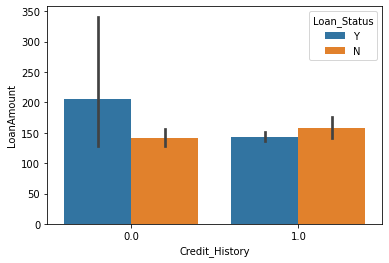

In [59]:
sns.barplot(x='Credit_History',y='LoanAmount',hue='Loan_Status',data=data)
plt.show()

- Loan Amount has high in 0 credit history but actualy credit_history has 1 those are low comparing to 0 credit_history.

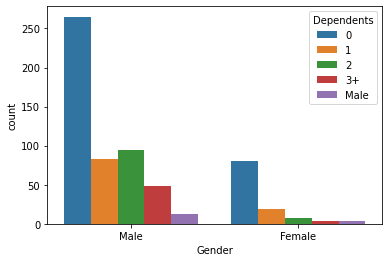

In [60]:
sns.countplot(x='Gender',hue='Dependents',data=data,)
plt.show()

- We can see, there are maximum dependents on male than female.
- In male categories, dependents 0 has maximum than others dependents
- In female categories, dependents 0 has maximum dependents on female.

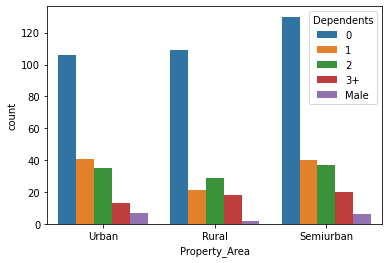

In [61]:
sns.countplot(x='Property_Area',hue='Dependents',data=data,)
plt.show()

- We can see, in semiurban has maximum dependents 0 followed by 1. In this area where dependency is decreasing.
- In rural are property there 0 dependents are more than others.

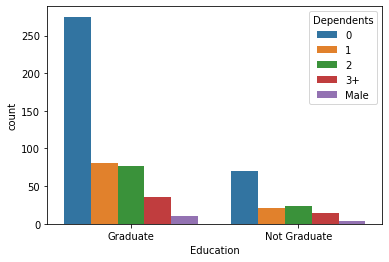

In [62]:
sns.countplot(x='Education',hue='Dependents',data=data,)
plt.show()

- In graduate, 0 dependents has more than thers.
- In non graduate, 0 dependents more than others.

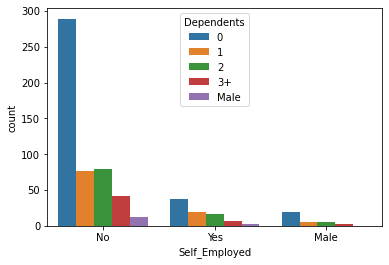

In [63]:
sns.countplot(x='Self_Employed',hue='Dependents',data=data,)
plt.show()

- In not self employed, here 0 dependents are maximum than other. Where as In self employed has low 0 dependents.

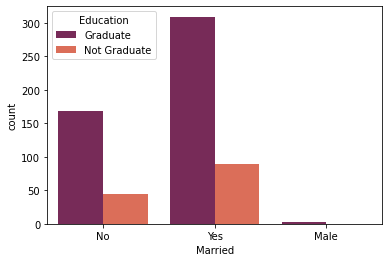

In [64]:
sns.countplot(x='Married',hue='Education',data=data,palette='rocket')
plt.show()

- We can see, mostly graduate are married their number is more than ohter.

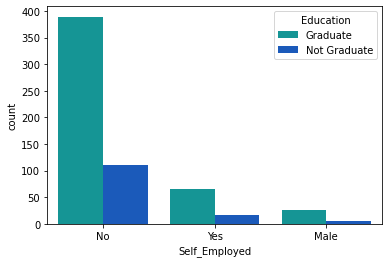

In [65]:
sns.countplot(x='Self_Employed',hue='Education',data=data,palette='winter_r')
plt.show()

- Those are not self employed thay mostly are graduate, whereas in self employed, there are graduate are more than non graduate.

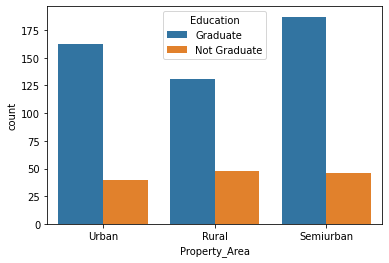

In [66]:
sns.countplot(x='Property_Area',hue='Education',data=data)
plt.show()

- We can see, in semiurban property area, graduate are holding more property than non graduate.
- In rural, non graduate holding property is more than other property area.

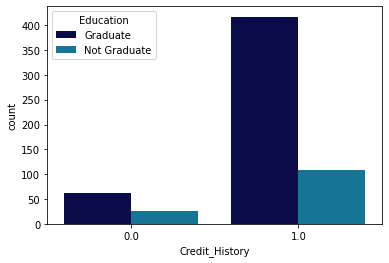

In [67]:
sns.countplot(x='Credit_History',hue='Education',data=data,palette='ocean')
plt.show()

- We can see, those applicant are graduate they have high credit_history.
- Comparing with bad credit history, in which graduate are more than non graduate. But in good credit history graduate have more than non graduate. Both are having huge diffference between both.

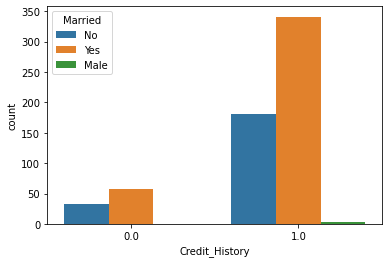

In [68]:
sns.countplot(x='Credit_History',hue='Married',data=data)
plt.show()

- We can see, married applicant have high good credit history than  not married applicant.\
- In bad credit history, in which married are having good credit history.

## 4.  Encoding of DataFrame

In [69]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [70]:
data.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
df_cols=("Gender","Education","Married","Self_Employed","Property_Area","Loan_Status",'Dependents')
for i in df_cols:
    data[i]=le.fit_transform(data[i])

In [73]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,5849,0.0,146.412162,360.0,1.0,2,1
1,1,2,1,0,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,2,0,0,2,3000,0.0,66.000000,360.0,1.0,2,1
3,1,2,0,1,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,1,0,0,1,6000,0.0,141.000000,360.0,1.0,2,1


## 5. Describe the Dataset

In [74]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,1.643322,0.842020,0.218241,1.081433,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.489511,1.120531,0.413389,0.423472,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### Outcome of describe of datasets:

 - Difference between 75% and max in ApplicantIncome, CoapplicantIncome and LoanAmount is high, columns is considerable indicating presence of outliers.
 - In categories features Mean to Standrad of deviation difference is close.

## 6. Correlation of the features with target column

In [75]:
data.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
Self_Employed       -0.011332
Dependents          -0.007318
ApplicantIncome     -0.004710
Gender               0.017987
Property_Area        0.032112
Married              0.075547
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

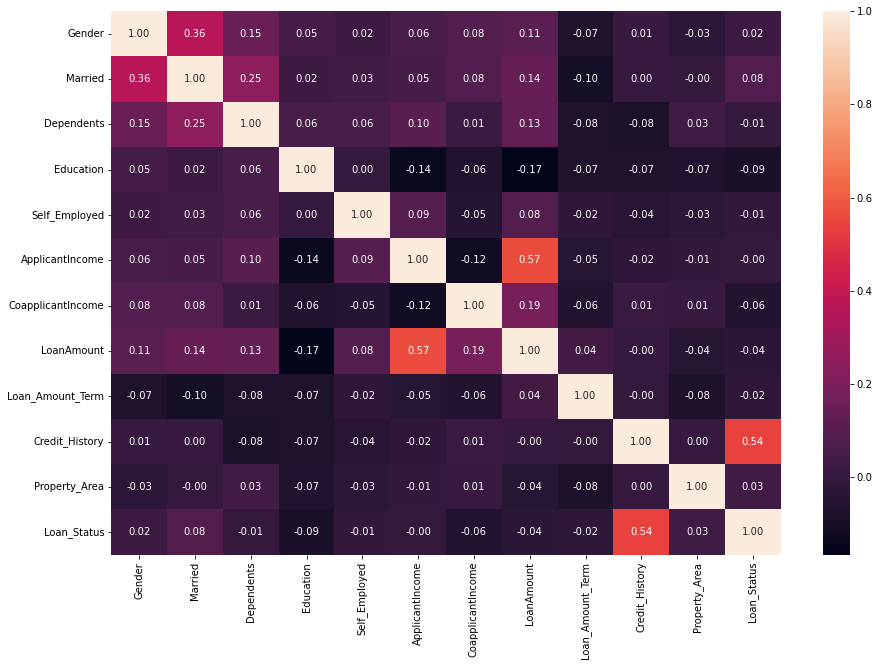

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation

 1. Gender has 2% positive correlation with target column.
 2. Married has 8% positive correlation with target column.
 3. Education has 9% negative correlation with target column.
 4. Self_employed has 1% negative correlation with target column.
 5. ApplicantIncome has 0% negative correlation with target columns.
 6. Coapplicant has 6% negative correlation with target column.
 7. LoanAmount has 4% negative correlation with target column.
 8. Credit_History has 54% positive correlation with target column.
 9. Property_Area has 3% positve correlation with target column.
 
 #### Features correlation to each other
 1. Gender has 32% positive correlation with Married.
 2. ApplicantIncome has 57% positive correlation with LoanAmount.

## 7. Visualizing correlation of feature columns with label column

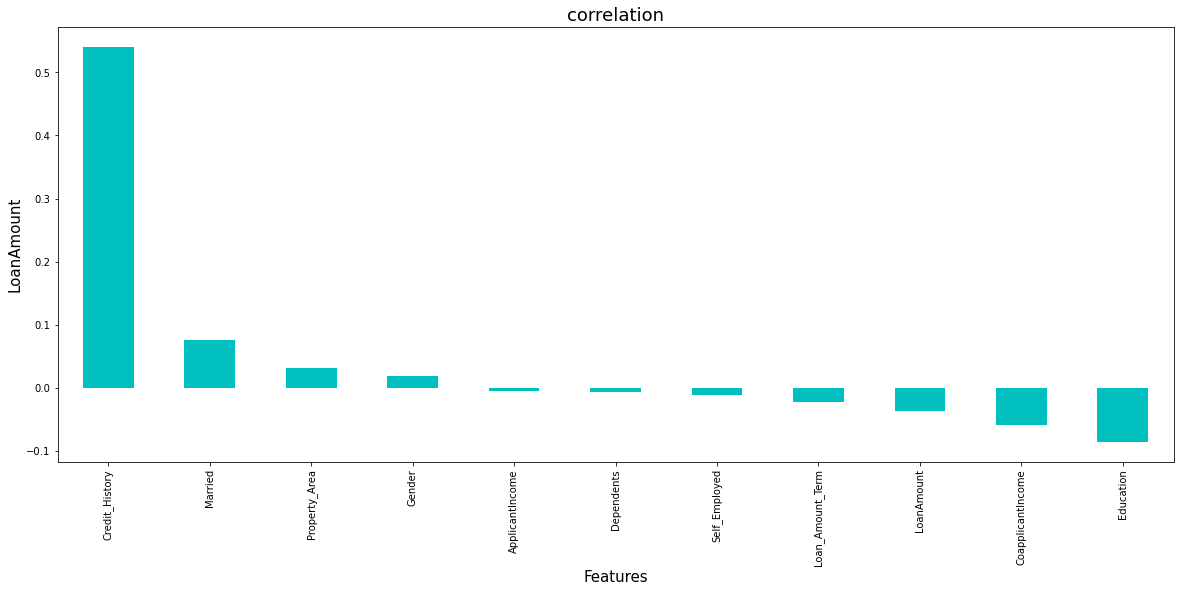

In [77]:
plt.figure(figsize = (20,8))
data.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Loan_Status',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed that Credit_History and Married have the highest positive correlation with Loan_Status.
- While Education and CopplicantIncmome have the highest negative correlation with Loan_Status.

## 8. Checking Distribution of data

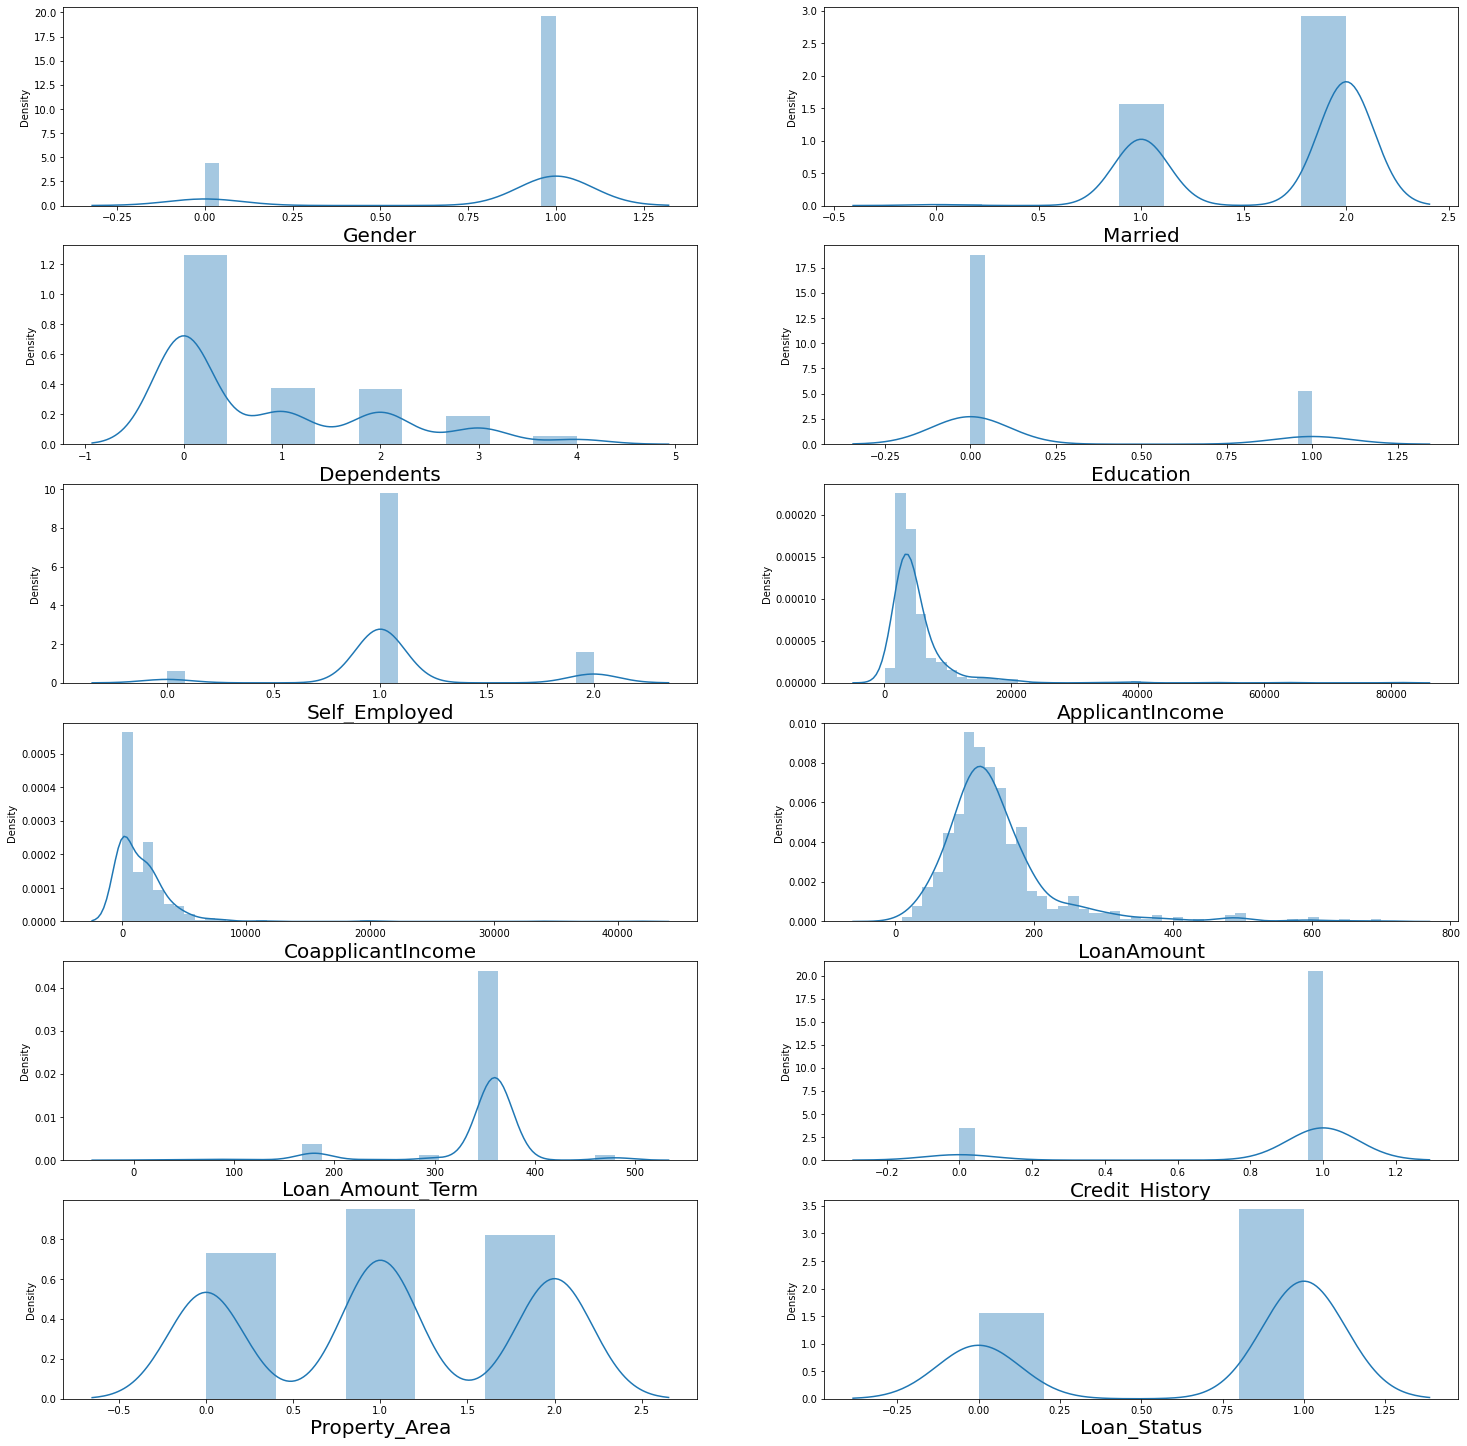

In [78]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- All feature seem to  right-skewed.
- We can ApplicantIncome, CoapplicantIncome and LoanAmount are positively skewed.

In [79]:
data.skew()

Gender              -1.648795
Married             -0.725064
Dependents           1.089068
Education            1.367622
Self_Employed        0.491660
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- Almost all continuous data are having skewness.

## 9. Checking Outliers

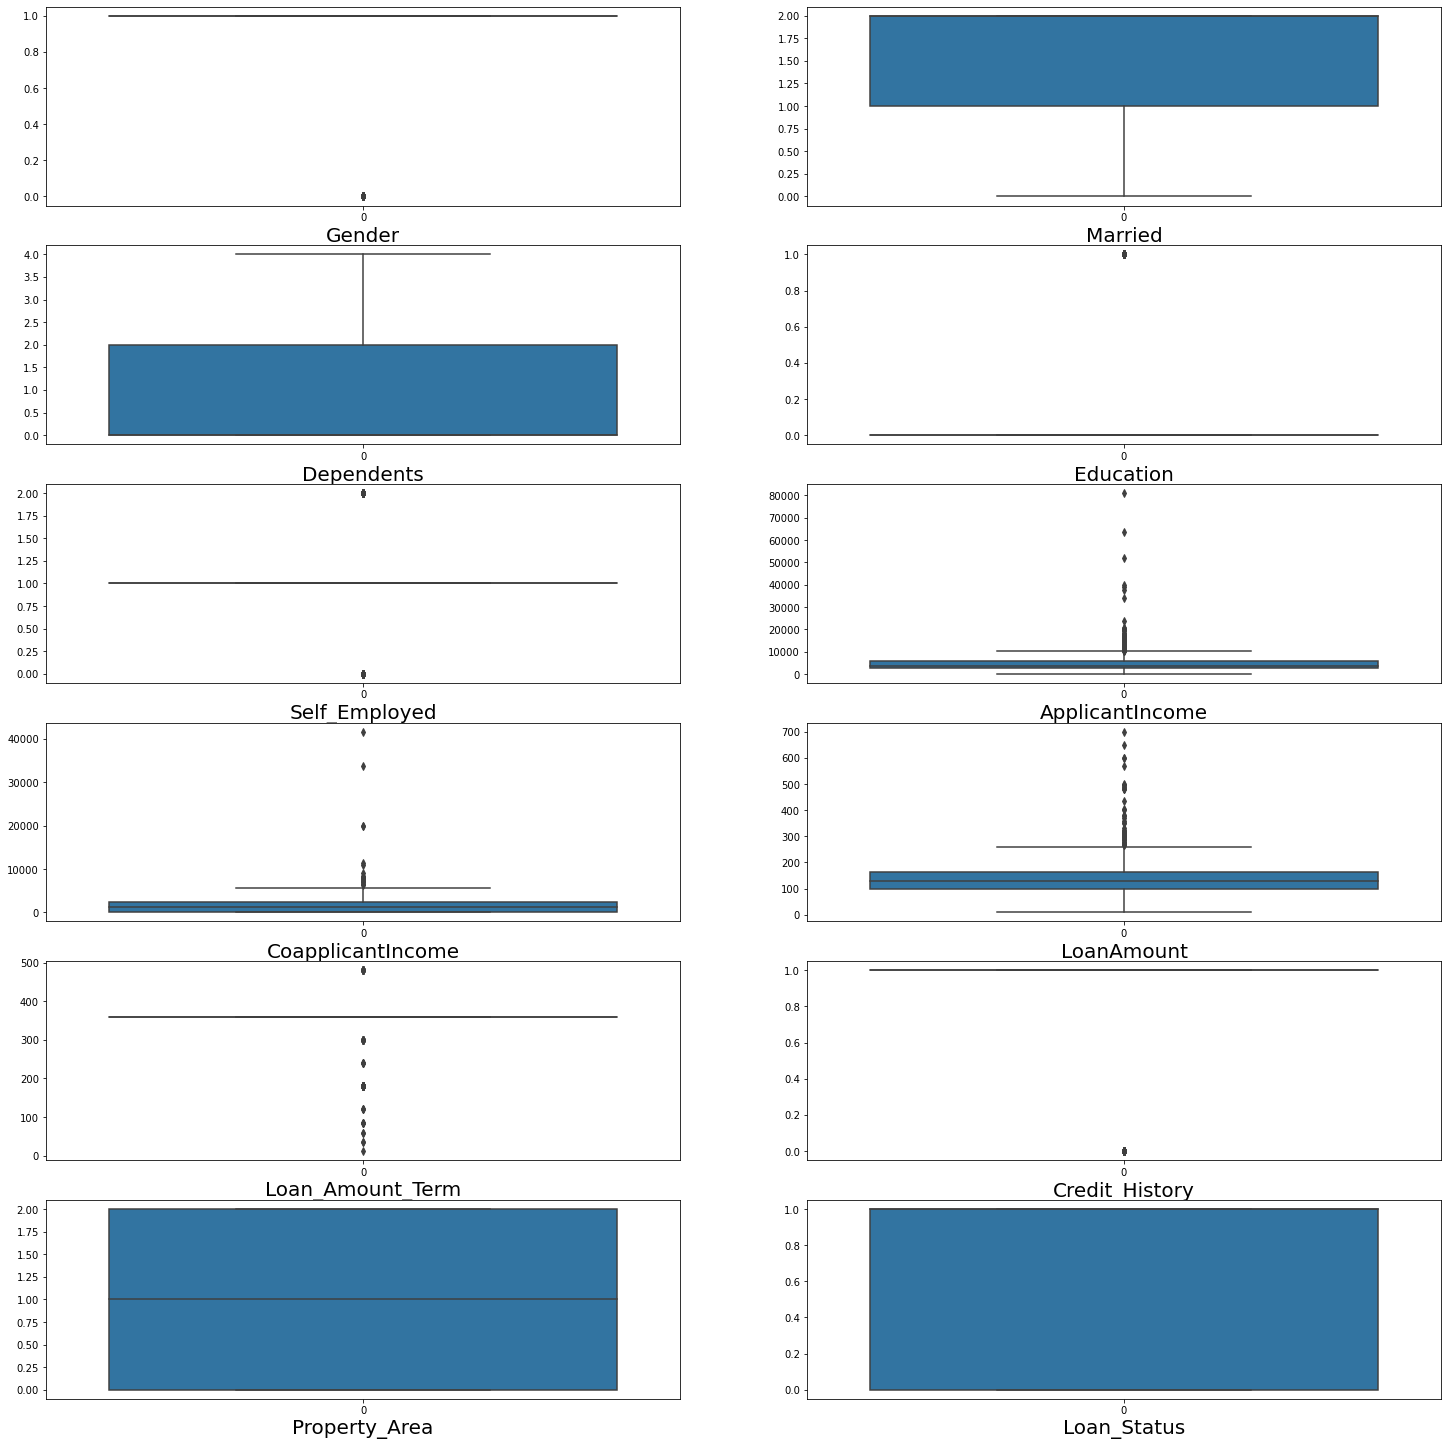

In [80]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=14:
        plt.subplot(7,2,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- ApplicantIncome, CoapplicantIncome and LoanAmount are having a more Outliers.
- Some feature are not having outliers but those are categorical features.

### 9.1  Removing Outliers

In [81]:
from scipy.stats import zscore

z_score = zscore(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]


In [82]:
df.shape

(589, 12)

In [83]:
data.shape

(614, 12)

### 9.2 Percentage of data loss

In [84]:
data_loss = ((614 - 589)/614*100)
print(data_loss,'%')

4.071661237785016 %


#### Data skewness before removing

In [85]:
data.skew()

Gender              -1.648795
Married             -0.725064
Dependents           1.089068
Education            1.367622
Self_Employed        0.491660
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#### Data skewness after removing

In [86]:
df.skew()

Gender              -1.626104
Married             -0.714564
Dependents           1.122419
Education            1.303332
Self_Employed        0.536461
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

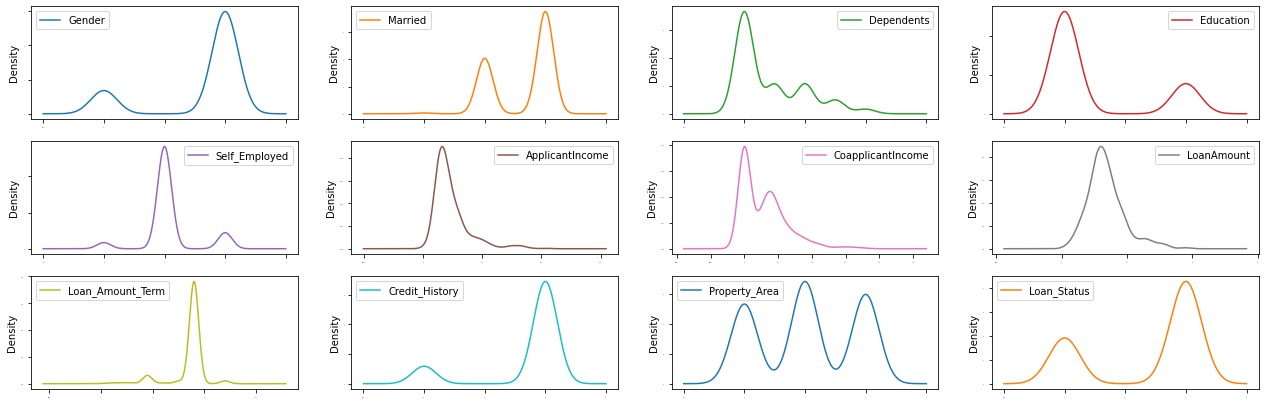

In [87]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

- can see, data is little nornally distributed after removing skewness.

## 10. Checking Multicollinearity

In [88]:
x = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif = pd.DataFrame()

In [93]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Gender,1.199201
1,Married,1.273153
2,Dependents,1.117694
3,Education,1.069075
4,Self_Employed,1.068498
5,ApplicantIncome,1.612212
6,CoapplicantIncome,1.447963
7,LoanAmount,1.661131
8,Loan_Amount_Term,1.048628
9,Credit_History,1.015114


- If VIF > 5, It means multicollinearity is present.
- MultiCollinearity does not exists Based on ANOVA F scores.

## 11. Model Building

In [94]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [95]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [96]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.47653262, -1.34201517, -0.85318356, ...,  0.17505466,
         0.41349021,  1.19229493],
       [ 0.47653262,  0.74131304,  0.75870895, ...,  0.17505466,
         0.41349021, -1.34552613],
       [ 0.47653262,  0.74131304, -0.85318356, ...,  0.17505466,
         0.41349021,  1.19229493],
       ...,
       [ 0.47653262,  0.74131304,  0.75870895, ...,  0.17505466,
         0.41349021,  1.19229493],
       [ 0.47653262,  0.74131304,  1.24772751, ...,  0.17505466,
         0.41349021,  1.19229493],
       [-2.09849225, -1.34201517, -0.85318356, ...,  0.17505466,
        -2.41843694,  0.00662524]])

## 11.1 Balancing Datasaet

In [97]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [98]:
smt_y.value_counts()

1    407
0    407
Name: Loan_Status, dtype: int64

## 11.2 LogisticRegression
### Finding Best Random state

In [99]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7877551020408163 on Random State 538


In [100]:
 x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=538)

In [101]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7877551020408163

### Cross - validation for logistic Regression

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [104]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 81.49476006618863
accuracy_score is:- 78.77551020408163


At cv:- 5
Cross validation score is:- 81.49645081848472
accuracy_score is:- 78.77551020408163


At cv:- 6
Cross validation score is:- 81.32172060743488
accuracy_score is:- 78.77551020408163


At cv:- 7
Cross validation score is:- 81.32052821128451
accuracy_score is:- 78.77551020408163


At cv:- 8
Cross validation score is:- 81.34024435394298
accuracy_score is:- 78.77551020408163


At cv:- 9
Cross validation score is:- 81.5099715099715
accuracy_score is:- 78.77551020408163




In [105]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8150997150997151 
The accuracy score is:  0.7877551020408163


In [106]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))
    

## 11.3 Random Forest Classifier
### Finding Best Random State

In [107]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8857142857142857 on Random State 413


In [108]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=413)

In [109]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 86.94%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       130
           1       0.83      0.91      0.87       115

    accuracy                           0.87       245
   macro avg       0.87      0.87      0.87       245
weighted avg       0.87      0.87      0.87       245


 Confusion Matrix: 
 [[108  22]
 [ 10 105]]


### Cross - Validation for Random Forest classifier

In [110]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [111]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 79.45509284795
accuracy_score is:- 86.93877551020408


At cv:- 5
Cross validation score is:- 79.28726640591047
accuracy_score is:- 86.93877551020408


At cv:- 6
Cross validation score is:- 80.13296227581942
accuracy_score is:- 86.93877551020408


At cv:- 7
Cross validation score is:- 80.3001200480192
accuracy_score is:- 86.93877551020408


At cv:- 8
Cross validation score is:- 79.80146242132544
accuracy_score is:- 86.93877551020408


At cv:- 9
Cross validation score is:- 79.29551929551928
accuracy_score is:- 86.93877551020408




In [113]:
lsscore_selected = cross_val_score(rf,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7962384953981593 
The accuracy score is:  0.8693877551020408


## 11.4 Gradient Boosting Classifier
### Finding Best Random State

In [114]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8530612244897959 on Random State 601


In [115]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=601)

In [116]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 92.09%

==========================Test Result=======================
Accuracy Score: 85.31%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       110
           1       0.84      0.91      0.87       135

    accuracy                           0.85       245
   macro avg       0.86      0.85      0.85       245
weighted avg       0.86      0.85      0.85       245


 Confusion Matrix: 
 [[ 86  24]
 [ 12 123]]


### Cross - validation For GradientBoosting Classifier

In [117]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [118]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 78.94948519948521
accuracy_score is:- 85.3061224489796


At cv:- 5
Cross validation score is:- 79.28726640591047
accuracy_score is:- 85.3061224489796


At cv:- 6
Cross validation score is:- 78.77413591699306
accuracy_score is:- 85.3061224489796


At cv:- 7
Cross validation score is:- 77.92717086834733
accuracy_score is:- 85.3061224489796


At cv:- 8
Cross validation score is:- 77.94566827101073
accuracy_score is:- 85.3061224489796


At cv:- 9
Cross validation score is:- 77.44366744366744
accuracy_score is:- 85.3061224489796




In [119]:
lsscore_selected = cross_val_score(gbc,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7911777488048675 
The accuracy score is:  0.8530612244897959


## 11.5 XGBOOST
### Finding Best Random State

In [120]:
from xgboost import XGBClassifier

In [121]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    xgb=XGBClassifier()
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

[13:26:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [122]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=551)

In [123]:
#import xgboost as xgb
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


[13:29:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 88.16%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       136
           1       0.86      0.88      0.87       109

    accuracy                           0.88       245
   macro avg       0.88      0.88      0.88       245
weighted avg       0.88      0.88      0.88       245


 Confusion Matrix: 
 [[120  16]
 [ 13  96]]


### Cross - Validation for XGBOOST

In [124]:
pred_xgb = xgb.predict(x_test)
accu = accuracy_score(y_test,pred_xgb)

In [125]:
for j in range(4,10):
    cross = cross_val_score(xgb,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

[13:29:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [126]:
lsscore_selected = cross_val_score(xgb,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

[13:29:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

## 11.6 SVC
### Finding Best Random State

In [127]:
from sklearn.svm import SVC

In [128]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8163265306122449 on Random State 538


In [129]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=538)

In [130]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 79.26%

==========================Test Result=======================
Accuracy Score: 81.63%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.71      0.79       117
           1       0.77      0.91      0.84       128

    accuracy                           0.82       245
   macro avg       0.83      0.81      0.81       245
weighted avg       0.83      0.82      0.81       245


 Confusion Matrix: 
 [[ 83  34]
 [ 11 117]]


### Cross - Validation for SVC

In [131]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [132]:
for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 81.83374701231844
accuracy_score is:- 81.63265306122449


At cv:- 5
Cross validation score is:- 81.49500217296828
accuracy_score is:- 81.63265306122449


At cv:- 6
Cross validation score is:- 81.66013880299595
accuracy_score is:- 81.63265306122449


At cv:- 7
Cross validation score is:- 81.66066426570627
accuracy_score is:- 81.63265306122449


At cv:- 8
Cross validation score is:- 81.84700111069974
accuracy_score is:- 81.63265306122449


At cv:- 9
Cross validation score is:- 81.84926184926185
accuracy_score is:- 81.63265306122449




In [133]:
lsscore_selected = cross_val_score(svc,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8184926184926185 
The accuracy score is:  0.8163265306122449


## 11.7 KNN
### Finding Random State 

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8040816326530612 on Random State 108


In [136]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=108)

In [137]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 80.49%

==========================Test Result=======================
Accuracy Score: 80.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       128
           1       0.78      0.83      0.80       117

    accuracy                           0.80       245
   macro avg       0.80      0.81      0.80       245
weighted avg       0.81      0.80      0.80       245


 Confusion Matrix: 
 [[100  28]
 [ 20  97]]


### Cross - Validation for KNN

In [138]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [139]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 77.76245633388491
accuracy_score is:- 80.40816326530611


At cv:- 5
Cross validation score is:- 79.62769810227437
accuracy_score is:- 80.40816326530611


At cv:- 6
Cross validation score is:- 78.43915343915344
accuracy_score is:- 80.40816326530611


At cv:- 7
Cross validation score is:- 77.9311724689876
accuracy_score is:- 80.40816326530611


At cv:- 8
Cross validation score is:- 78.95686782673084
accuracy_score is:- 80.40816326530611


At cv:- 9
Cross validation score is:- 78.96140896140895
accuracy_score is:- 80.40816326530611




In [140]:
lsscore_selected = cross_val_score(knn,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7962769810227437 
The accuracy score is:  0.8040816326530612


## 12. Selecting Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined Support Vector Classifier is the best model. It has least difference between accuracy score and cross validation. 

## 13. Hyperparameter Tuning

In [141]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [145]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=538)

In [146]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly','sigmoid'],
            'class_weight':['balanced', None] } 

In [147]:
gridsearch = GridSearchCV(svc, param_grid)

gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'C': 10, 'class_weight': None, 'gamma': 1, 'kernel': 'rbf'}

In [339]:
# SVC Model training and printing train and test score (post param update)
svc = SVC(C =1.02, gamma =0.1, kernel='rbf', class_weight=None)
svc.fit(x_train,y_train)

# Call the function and pass dataset to check train and test score
metric_score(svc,x_train,x_test,y_train,y_test, train=True)

metric_score(svc,x_train,x_test,y_train,y_test, train=False)



========================== Train Result=============================
Accuracy Score: 80.84%

==========================Test Result=======================
Accuracy Score: 82.04%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       117
           1       0.79      0.90      0.84       128

    accuracy                           0.82       245
   macro avg       0.83      0.82      0.82       245
weighted avg       0.83      0.82      0.82       245


 Confusion Matrix: 
 [[ 86  31]
 [ 13 115]]


## 14. ROC_AUC Curve

In [340]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

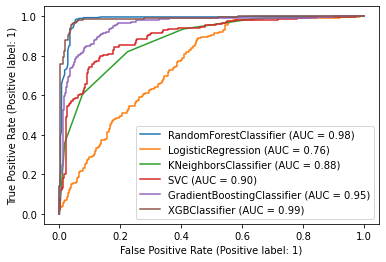

In [341]:
# AUC Curve For Training
disp = plot_roc_curve(rf,x_train,y_train)

plot_roc_curve(lr,x_train,y_train, ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train, ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train, ax=disp.ax_)

plot_roc_curve(gbc, x_train,y_train, ax=disp.ax_)

plot_roc_curve(xgb, x_train,y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

<Figure size 1440x1080 with 0 Axes>

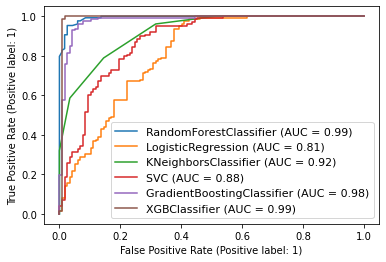

In [342]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp = plot_roc_curve(rf,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test, ax=disp.ax_)

plot_roc_curve(gbc, x_test,y_test, ax=disp.ax_)

plot_roc_curve(xgb, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

## 15. Documenting the finding

- We can see, the null values present in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History.
- We can see, Yes are indicating that loan applications are accepted. While No indicated that, Loan application rejected or In process.

- Here 0 has maximum number. It means that applicant is married or may be not or single there is no one is depending on applicant.Due this chance of approval of loan is maximum.
- Male are maximum whose applying for loan then Female. And their loan aaproval is high. It just because female are less applying for loan than male. But Overall accepatance of application is high in female than male.
- In credit_history have two categories in which those are having credit history 1(good), they have maximum chance to get loan. Credit_history is only feature that it has maximum correlation with target features.
- If we talk about married or not in which the married people are having high chance to get loan followed by unmarried. Becouse the married people are applying more than unmarried for loan. And Institute have a good faith on married people than unmarried.
- We found that, maximum male are not self employed. In not self employed, male are more than female. It mean that percentage of both male and female are having big difference. In self employed male are more than female.
- Education has high impact on deciding whether person got loan or not. Becouse graduate people have more chance to get loan than non-graduate people. But have some dilemma that,the ratio between acceptance of application and rejection in which non graduate are having good proportion than graduate.
- We found that, male are more self employed than female and male are more dependent than female on applicant, which is show that female are doing good than male.
- We found that, those applicants are having good income than its coapplicant they are having high chance to getting loan. Which is show, applicant should have well income than others.
- SVC is best model for this dataset.


## 16. Model Save

In [343]:
import joblib
joblib.dump(svc,"loan_application_prediction.pkl")

['loan_application_prediction.pkl']

### Loading The Model

In [344]:
mod=joblib.load("loan_application_prediction.pkl")

In [345]:
print(mod.predict(x))

[0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0
 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 

In [346]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,0,1
1,1,0
2,1,1
3,1,1
4,0,1
5,1,1
6,1,1
7,0,0
8,1,1
10,1,1
